# Predicting heart disease using machine learning


This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement, 
> Given clinical paramters about a patient, can we predict whether or not they have heart disease. 

## 2. Data

The original data came from the Cleaveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it in kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at prediction whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

THis is where you will get different information about each of the features on the data

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipuylation.

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline # we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape # (row, columns)

(303, 14)

## Data exploration (explpratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add or change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find our how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

165 have heart diseas and 138 does not have heart disease.
This is a balanced class set that we have here

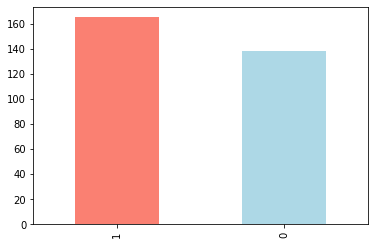

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
# Let's look at the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Let's take a look at the statistical data of our dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There is a lot more 1=male than 0=female 

In [11]:
# Compare target column with gender column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Base on our existing dataset, if our participant is 0=Female, there is around 72/96 chance that she has heart disease. Else if our participant is 1=male, 93/207 indicate has a heart disease.

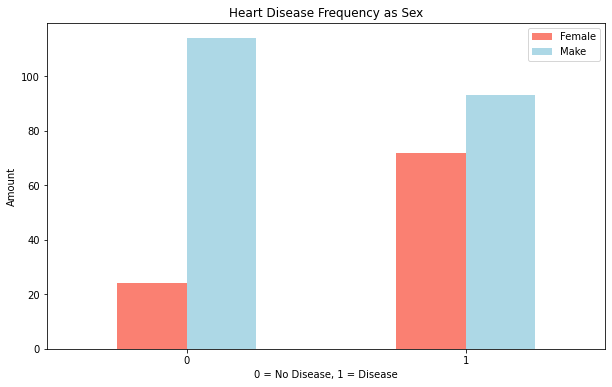

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                    figsize=(10, 6),
                                   color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency as Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Make'])
plt.xticks(rotation=0);

In [13]:
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease

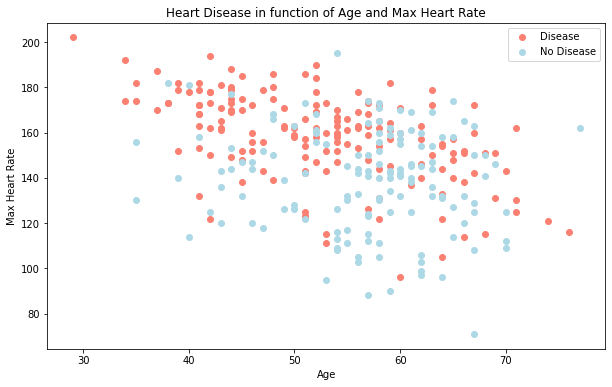

In [14]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue');

# Add some helfpul info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

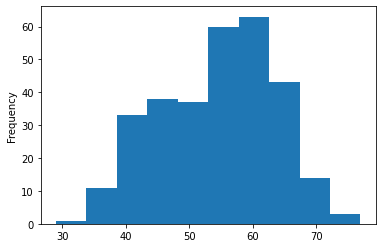

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

Most of our population is at 55-65. This is a normal distribution curve.

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
# Compare target column with chest pain column
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


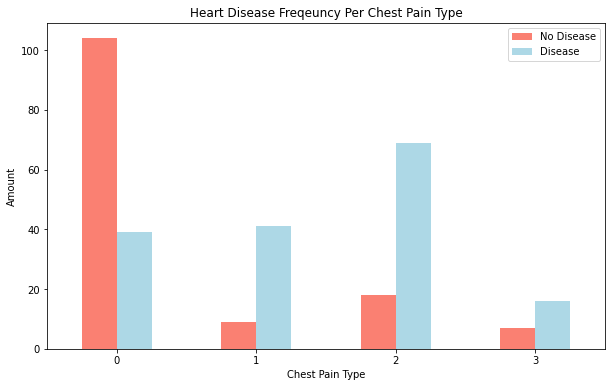

In [17]:
# Make the crosstabe more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10, 6),
                                  color=['salmon', 'lightblue'])

# Add some communication
plt.title('Heart Disease Freqeuncy Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


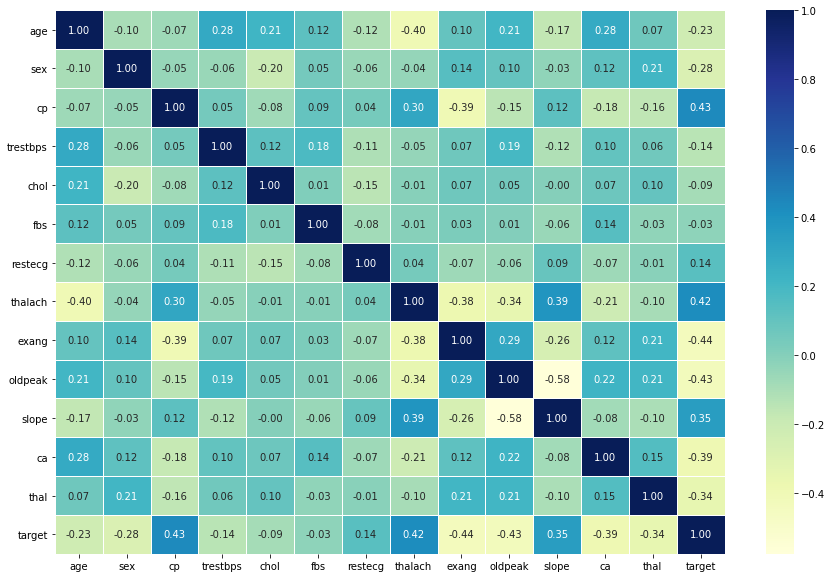

In [19]:
# Let's make our correlation matrix a little pretier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into x=features, y=labels
x = df.drop('target', axis=1)
y = df['target'] 

In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test sets
np.random.seed(42)

# Split data into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we have got our data split into training and test sets, it's time to build a machine learning model.

We will train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistics Regression
2. K-Nearest Neighbour
3. Random Forest Classifier

In [27]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

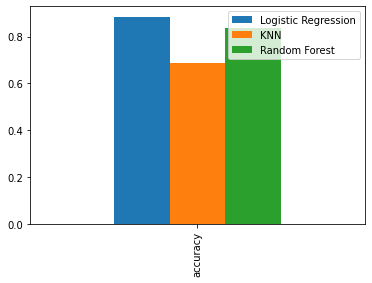

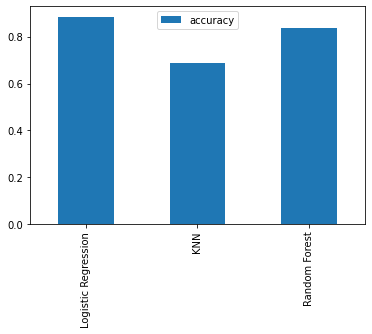

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.bar(); # Transpose the graph to visualize correctly
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [30]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors =i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


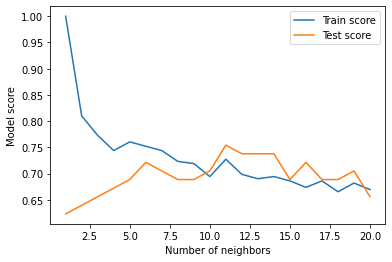

In [33]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label= 'Test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [36]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifer
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

Now we have got hyperparameter grid setup for each of our models, let's tune them using RandomizedSearchCV

In [37]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()


In [41]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

SInce our LogisticRegression model provides the best scores so far, e'll try and improve them using GridSearchCV

In [47]:
# Different hyperparameters for our LogisticsRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparmeter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# Evaluate the grid search LogisticsREgression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [50]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score 
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-Score

... and it would be great if cross-validation is used when possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [51]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(x_test)

In [52]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

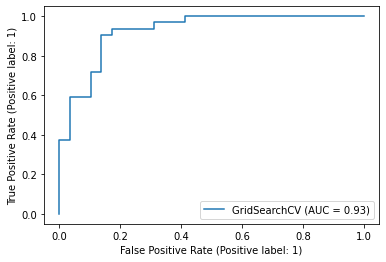

In [55]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);

In [56]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


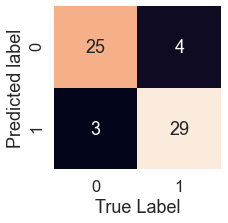

In [57]:
# Plot conusion matrix with seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's hetmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)

Now we have got ROC curve, AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and F1- score.

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`.

In [60]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                        solver='liblinear')

In [87]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [73]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [74]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [75]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

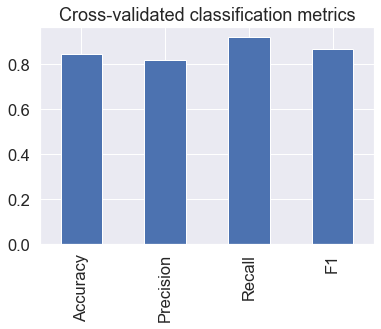

In [76]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False);

### Feature Importance

Feature importance is another way of asking which features contributed most to the outcome of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature imoportance for our LogisticsRegression model...

In [78]:
# Fit an instance of LogisticsRegression
gs_log_reg.best_params_

clf = LogisticRegression(C= 0.20433597178569418,
                        solver='liblinear')

clf.fit(x_train, y_train);

In [79]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

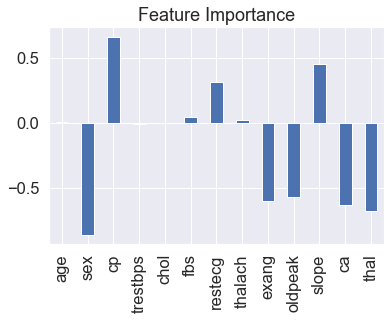

In [82]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [83]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [85]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

### 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

1. Could you collect more data?
2. Could you try a better model? Like CatBoost or XGBoost?
3. Could you improve the current models? Beyond the current hyperparameters tuning.
4. If your model is good enough, you have hit your evaluation metric how would you export and share it with others?

### 1. Could you collect more data? 

I would like to get more data but since this is an experimental dataset, more data will probably not be possible

### 2. Could you try a better model? Like CatBoost or XGBoost?
* Let's try with CatBoost

In [112]:
# Start Python Imports
import time, datetime

# Import CatBoost Model
import catboost
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [113]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [114]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [115]:
# Define the categorical features for the CatBoost model
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12], dtype=int64)

This means Catboost has picked up that all variables.

In [116]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(x_train, 
                  y_train,
                  cat_features)

In [117]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [118]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.005621
0:	learn: 0.6891859	total: 20.5ms	remaining: 20.4s
1:	learn: 0.6846503	total: 43.9ms	remaining: 21.9s
2:	learn: 0.6805103	total: 68.4ms	remaining: 22.7s
3:	learn: 0.6765895	total: 90.2ms	remaining: 22.5s
4:	learn: 0.6727577	total: 113ms	remaining: 22.4s
5:	learn: 0.6692774	total: 133ms	remaining: 22s
6:	learn: 0.6651163	total: 156ms	remaining: 22.2s
7:	learn: 0.6610312	total: 180ms	remaining: 22.3s
8:	learn: 0.6569415	total: 208ms	remaining: 22.9s
9:	learn: 0.6525232	total: 234ms	remaining: 23.2s
10:	learn: 0.6481584	total: 259ms	remaining: 23.3s
11:	learn: 0.6459065	total: 269ms	remaining: 22.1s
12:	learn: 0.6423627	total: 288ms	remaining: 21.9s
13:	learn: 0.6385934	total: 310ms	remaining: 21.9s
14:	learn: 0.6348098	total: 334ms	remaining: 21.9s
15:	learn: 0.6311262	total: 361ms	remaining: 22.2s
16:	learn: 0.6274742	total: 388ms	remaining: 22.4s
17:	learn: 0.6239731	total: 410ms	remaining: 22.3s
18:	learn: 0.6200747	total: 433ms	remaining: 22.4s
19:	learn

162:	learn: 0.3707060	total: 3.71s	remaining: 19.1s
163:	learn: 0.3704631	total: 3.73s	remaining: 19s
164:	learn: 0.3695803	total: 3.75s	remaining: 19s
165:	learn: 0.3689536	total: 3.77s	remaining: 18.9s
166:	learn: 0.3687673	total: 3.78s	remaining: 18.9s
167:	learn: 0.3684369	total: 3.8s	remaining: 18.8s
168:	learn: 0.3677207	total: 3.82s	remaining: 18.8s
169:	learn: 0.3671697	total: 3.85s	remaining: 18.8s
170:	learn: 0.3662186	total: 3.88s	remaining: 18.8s
171:	learn: 0.3653712	total: 3.9s	remaining: 18.8s
172:	learn: 0.3643649	total: 3.93s	remaining: 18.8s
173:	learn: 0.3634152	total: 3.95s	remaining: 18.7s
174:	learn: 0.3626973	total: 3.97s	remaining: 18.7s
175:	learn: 0.3623175	total: 4s	remaining: 18.7s
176:	learn: 0.3612570	total: 4.02s	remaining: 18.7s
177:	learn: 0.3605706	total: 4.04s	remaining: 18.6s
178:	learn: 0.3602452	total: 4.05s	remaining: 18.6s
179:	learn: 0.3594020	total: 4.08s	remaining: 18.6s
180:	learn: 0.3585960	total: 4.1s	remaining: 18.6s
181:	learn: 0.3577279	

330:	learn: 0.2804705	total: 7.3s	remaining: 14.7s
331:	learn: 0.2801779	total: 7.32s	remaining: 14.7s
332:	learn: 0.2796985	total: 7.34s	remaining: 14.7s
333:	learn: 0.2792460	total: 7.36s	remaining: 14.7s
334:	learn: 0.2787941	total: 7.38s	remaining: 14.7s
335:	learn: 0.2784163	total: 7.41s	remaining: 14.6s
336:	learn: 0.2780588	total: 7.43s	remaining: 14.6s
337:	learn: 0.2773411	total: 7.46s	remaining: 14.6s
338:	learn: 0.2771909	total: 7.48s	remaining: 14.6s
339:	learn: 0.2766761	total: 7.51s	remaining: 14.6s
340:	learn: 0.2763328	total: 7.53s	remaining: 14.6s
341:	learn: 0.2757646	total: 7.55s	remaining: 14.5s
342:	learn: 0.2754407	total: 7.57s	remaining: 14.5s
343:	learn: 0.2750617	total: 7.6s	remaining: 14.5s
344:	learn: 0.2747366	total: 7.62s	remaining: 14.5s
345:	learn: 0.2745012	total: 7.65s	remaining: 14.5s
346:	learn: 0.2739203	total: 7.67s	remaining: 14.4s
347:	learn: 0.2735687	total: 7.7s	remaining: 14.4s
348:	learn: 0.2731134	total: 7.72s	remaining: 14.4s
349:	learn: 0.2

495:	learn: 0.2287837	total: 11.2s	remaining: 11.4s
496:	learn: 0.2285142	total: 11.3s	remaining: 11.4s
497:	learn: 0.2284339	total: 11.3s	remaining: 11.4s
498:	learn: 0.2281065	total: 11.3s	remaining: 11.4s
499:	learn: 0.2278216	total: 11.3s	remaining: 11.3s
500:	learn: 0.2276080	total: 11.4s	remaining: 11.3s
501:	learn: 0.2273548	total: 11.4s	remaining: 11.3s
502:	learn: 0.2271483	total: 11.4s	remaining: 11.3s
503:	learn: 0.2267465	total: 11.5s	remaining: 11.3s
504:	learn: 0.2263045	total: 11.5s	remaining: 11.3s
505:	learn: 0.2259559	total: 11.5s	remaining: 11.2s
506:	learn: 0.2256779	total: 11.5s	remaining: 11.2s
507:	learn: 0.2253684	total: 11.6s	remaining: 11.2s
508:	learn: 0.2250545	total: 11.6s	remaining: 11.2s
509:	learn: 0.2247736	total: 11.6s	remaining: 11.2s
510:	learn: 0.2245562	total: 11.6s	remaining: 11.1s
511:	learn: 0.2244625	total: 11.6s	remaining: 11.1s
512:	learn: 0.2242228	total: 11.7s	remaining: 11.1s
513:	learn: 0.2239974	total: 11.7s	remaining: 11.1s
514:	learn: 

662:	learn: 0.1916643	total: 15.1s	remaining: 7.67s
663:	learn: 0.1915038	total: 15.1s	remaining: 7.64s
664:	learn: 0.1913347	total: 15.1s	remaining: 7.62s
665:	learn: 0.1912273	total: 15.1s	remaining: 7.6s
666:	learn: 0.1910082	total: 15.2s	remaining: 7.57s
667:	learn: 0.1908036	total: 15.2s	remaining: 7.55s
668:	learn: 0.1904214	total: 15.2s	remaining: 7.53s
669:	learn: 0.1902728	total: 15.2s	remaining: 7.5s
670:	learn: 0.1900308	total: 15.3s	remaining: 7.48s
671:	learn: 0.1898515	total: 15.3s	remaining: 7.46s
672:	learn: 0.1897004	total: 15.3s	remaining: 7.43s
673:	learn: 0.1895440	total: 15.3s	remaining: 7.41s
674:	learn: 0.1895307	total: 15.3s	remaining: 7.39s
675:	learn: 0.1892800	total: 15.4s	remaining: 7.37s
676:	learn: 0.1890082	total: 15.4s	remaining: 7.34s
677:	learn: 0.1888811	total: 15.4s	remaining: 7.32s
678:	learn: 0.1887703	total: 15.4s	remaining: 7.29s
679:	learn: 0.1885361	total: 15.5s	remaining: 7.27s
680:	learn: 0.1884009	total: 15.5s	remaining: 7.25s
681:	learn: 0.

822:	learn: 0.1643890	total: 19s	remaining: 4.08s
823:	learn: 0.1643095	total: 19s	remaining: 4.05s
824:	learn: 0.1641261	total: 19s	remaining: 4.03s
825:	learn: 0.1640179	total: 19s	remaining: 4.01s
826:	learn: 0.1638414	total: 19.1s	remaining: 3.99s
827:	learn: 0.1636813	total: 19.1s	remaining: 3.96s
828:	learn: 0.1634886	total: 19.1s	remaining: 3.94s
829:	learn: 0.1633772	total: 19.2s	remaining: 3.92s
830:	learn: 0.1632420	total: 19.2s	remaining: 3.9s
831:	learn: 0.1630293	total: 19.2s	remaining: 3.88s
832:	learn: 0.1629412	total: 19.3s	remaining: 3.86s
833:	learn: 0.1628027	total: 19.3s	remaining: 3.84s
834:	learn: 0.1626970	total: 19.3s	remaining: 3.81s
835:	learn: 0.1625029	total: 19.3s	remaining: 3.79s
836:	learn: 0.1624018	total: 19.4s	remaining: 3.77s
837:	learn: 0.1621136	total: 19.4s	remaining: 3.75s
838:	learn: 0.1619720	total: 19.4s	remaining: 3.73s
839:	learn: 0.1618770	total: 19.5s	remaining: 3.71s
840:	learn: 0.1617637	total: 19.5s	remaining: 3.68s
841:	learn: 0.1616741

982:	learn: 0.1408625	total: 23.2s	remaining: 400ms
983:	learn: 0.1408019	total: 23.2s	remaining: 377ms
984:	learn: 0.1406752	total: 23.2s	remaining: 354ms
985:	learn: 0.1405160	total: 23.3s	remaining: 330ms
986:	learn: 0.1403742	total: 23.3s	remaining: 307ms
987:	learn: 0.1402777	total: 23.3s	remaining: 283ms
988:	learn: 0.1399325	total: 23.3s	remaining: 260ms
989:	learn: 0.1398108	total: 23.4s	remaining: 236ms
990:	learn: 0.1397481	total: 23.4s	remaining: 212ms
991:	learn: 0.1396284	total: 23.4s	remaining: 189ms
992:	learn: 0.1393000	total: 23.5s	remaining: 165ms
993:	learn: 0.1392184	total: 23.5s	remaining: 142ms
994:	learn: 0.1391805	total: 23.5s	remaining: 118ms
995:	learn: 0.1390142	total: 23.6s	remaining: 94.6ms
996:	learn: 0.1389213	total: 23.6s	remaining: 71ms
997:	learn: 0.1387902	total: 23.6s	remaining: 47.3ms
998:	learn: 0.1385989	total: 23.6s	remaining: 23.7ms
999:	learn: 0.1385342	total: 23.7s	remaining: 0us


### Perform CatBoost cross-validation

In [119]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6727349	test: 0.6753755	best: 0.6753755 (0)
1:	learn: 0.6532806	test: 0.6573746	best: 0.6573746 (1)
2:	learn: 0.6327526	test: 0.6400975	best: 0.6400975 (2)
3:	learn: 0.6158972	test: 0.6250549	best: 0.6250549 (3)
4:	learn: 0.5981743	test: 0.6105861	best: 0.6105861 (4)
5:	learn: 0.5817928	test: 0.5959275	best: 0.5959275 (5)
6:	learn: 0.5661896	test: 0.5833957	best: 0.5833957 (6)
7:	learn: 0.5524703	test: 0.5714314	best: 0.5714314 (7)
8:	learn: 0.5397730	test: 0.5611340	best: 0.5611340 (8)
9:	learn: 0.5273036	test: 0.5517680	best: 0.5517680 (9)
10:	learn: 0.5164354	test: 0.5418226	best: 0.5418226 (10)
11:	learn: 0.5060269	test: 0.5336091	best: 0.5336091 (11)
12:	learn: 0.4964965	test: 0.5255764	best: 0.5255764 (12)
13:	learn: 0.4866132	test: 0.5184500	best: 0.5184500 (13)
14:	learn: 0.4770967	test: 0.5115558	best: 0.5115558 (14)
15:	learn: 0.4675576	test: 0.5045245	best: 0.5045245 (15)
16:	learn: 0.4576839	test: 0.4988556	best: 0.4988556 (16)
17:	learn: 0.4497904	test: 0.49355

142:	learn: 0.1753123	test: 0.4048796	best: 0.4010704 (107)
143:	learn: 0.1742389	test: 0.4042087	best: 0.4010704 (107)
144:	learn: 0.1733826	test: 0.4040672	best: 0.4010704 (107)
145:	learn: 0.1724428	test: 0.4044714	best: 0.4010704 (107)
146:	learn: 0.1713628	test: 0.4042021	best: 0.4010704 (107)
147:	learn: 0.1706794	test: 0.4042012	best: 0.4010704 (107)
148:	learn: 0.1697553	test: 0.4038342	best: 0.4010704 (107)
149:	learn: 0.1688283	test: 0.4044438	best: 0.4010704 (107)
150:	learn: 0.1680783	test: 0.4046251	best: 0.4010704 (107)
151:	learn: 0.1669983	test: 0.4043912	best: 0.4010704 (107)
152:	learn: 0.1660285	test: 0.4049050	best: 0.4010704 (107)
153:	learn: 0.1652795	test: 0.4053699	best: 0.4010704 (107)
154:	learn: 0.1644224	test: 0.4052207	best: 0.4010704 (107)
155:	learn: 0.1634586	test: 0.4051510	best: 0.4010704 (107)
156:	learn: 0.1627826	test: 0.4054487	best: 0.4010704 (107)
157:	learn: 0.1618019	test: 0.4058496	best: 0.4010704 (107)
158:	learn: 0.1606468	test: 0.4053287	be

281:	learn: 0.0945654	test: 0.4176656	best: 0.4010704 (107)
282:	learn: 0.0941029	test: 0.4181057	best: 0.4010704 (107)
283:	learn: 0.0937703	test: 0.4183743	best: 0.4010704 (107)
284:	learn: 0.0933700	test: 0.4186340	best: 0.4010704 (107)
285:	learn: 0.0930994	test: 0.4182498	best: 0.4010704 (107)
286:	learn: 0.0927564	test: 0.4187447	best: 0.4010704 (107)
287:	learn: 0.0922951	test: 0.4186331	best: 0.4010704 (107)
288:	learn: 0.0918756	test: 0.4186947	best: 0.4010704 (107)
289:	learn: 0.0915139	test: 0.4189799	best: 0.4010704 (107)
290:	learn: 0.0911743	test: 0.4190767	best: 0.4010704 (107)
291:	learn: 0.0907990	test: 0.4193965	best: 0.4010704 (107)
292:	learn: 0.0905373	test: 0.4194837	best: 0.4010704 (107)
293:	learn: 0.0900394	test: 0.4197766	best: 0.4010704 (107)
294:	learn: 0.0896919	test: 0.4200151	best: 0.4010704 (107)
295:	learn: 0.0892855	test: 0.4203339	best: 0.4010704 (107)
296:	learn: 0.0889508	test: 0.4202941	best: 0.4010704 (107)
297:	learn: 0.0886112	test: 0.4206514	be

431:	learn: 0.0557592	test: 0.4368736	best: 0.4010704 (107)
432:	learn: 0.0556162	test: 0.4370296	best: 0.4010704 (107)
433:	learn: 0.0554290	test: 0.4372775	best: 0.4010704 (107)
434:	learn: 0.0552913	test: 0.4375855	best: 0.4010704 (107)
435:	learn: 0.0551517	test: 0.4376490	best: 0.4010704 (107)
436:	learn: 0.0549939	test: 0.4378849	best: 0.4010704 (107)
437:	learn: 0.0548140	test: 0.4377792	best: 0.4010704 (107)
438:	learn: 0.0546827	test: 0.4378369	best: 0.4010704 (107)
439:	learn: 0.0545592	test: 0.4380383	best: 0.4010704 (107)
440:	learn: 0.0543179	test: 0.4385414	best: 0.4010704 (107)
441:	learn: 0.0541494	test: 0.4385534	best: 0.4010704 (107)
442:	learn: 0.0540226	test: 0.4385707	best: 0.4010704 (107)
443:	learn: 0.0538376	test: 0.4388719	best: 0.4010704 (107)
444:	learn: 0.0536106	test: 0.4389636	best: 0.4010704 (107)
445:	learn: 0.0534658	test: 0.4393034	best: 0.4010704 (107)
446:	learn: 0.0533018	test: 0.4394512	best: 0.4010704 (107)
447:	learn: 0.0531423	test: 0.4396587	be

566:	learn: 0.0384058	test: 0.4561538	best: 0.4010704 (107)
567:	learn: 0.0383060	test: 0.4562392	best: 0.4010704 (107)
568:	learn: 0.0382008	test: 0.4565121	best: 0.4010704 (107)
569:	learn: 0.0381111	test: 0.4566331	best: 0.4010704 (107)
570:	learn: 0.0380094	test: 0.4570122	best: 0.4010704 (107)
571:	learn: 0.0379096	test: 0.4570777	best: 0.4010704 (107)
572:	learn: 0.0378290	test: 0.4574475	best: 0.4010704 (107)
573:	learn: 0.0377326	test: 0.4577069	best: 0.4010704 (107)
574:	learn: 0.0376416	test: 0.4577983	best: 0.4010704 (107)
575:	learn: 0.0375429	test: 0.4580147	best: 0.4010704 (107)
576:	learn: 0.0374845	test: 0.4579413	best: 0.4010704 (107)
577:	learn: 0.0374082	test: 0.4579608	best: 0.4010704 (107)
578:	learn: 0.0373303	test: 0.4579931	best: 0.4010704 (107)
579:	learn: 0.0372395	test: 0.4583045	best: 0.4010704 (107)
580:	learn: 0.0371575	test: 0.4585917	best: 0.4010704 (107)
581:	learn: 0.0370766	test: 0.4584753	best: 0.4010704 (107)
582:	learn: 0.0369870	test: 0.4586395	be

706:	learn: 0.0282825	test: 0.4696907	best: 0.4010704 (107)
707:	learn: 0.0282417	test: 0.4696639	best: 0.4010704 (107)
708:	learn: 0.0281863	test: 0.4699435	best: 0.4010704 (107)
709:	learn: 0.0281427	test: 0.4699522	best: 0.4010704 (107)
710:	learn: 0.0280867	test: 0.4699610	best: 0.4010704 (107)
711:	learn: 0.0280232	test: 0.4700219	best: 0.4010704 (107)
712:	learn: 0.0279651	test: 0.4702146	best: 0.4010704 (107)
713:	learn: 0.0279108	test: 0.4705427	best: 0.4010704 (107)
714:	learn: 0.0278628	test: 0.4706083	best: 0.4010704 (107)
715:	learn: 0.0278195	test: 0.4707568	best: 0.4010704 (107)
716:	learn: 0.0277635	test: 0.4710038	best: 0.4010704 (107)
717:	learn: 0.0277039	test: 0.4709920	best: 0.4010704 (107)
718:	learn: 0.0276669	test: 0.4711195	best: 0.4010704 (107)
719:	learn: 0.0276275	test: 0.4712711	best: 0.4010704 (107)
720:	learn: 0.0275837	test: 0.4713733	best: 0.4010704 (107)
721:	learn: 0.0275410	test: 0.4714534	best: 0.4010704 (107)
722:	learn: 0.0274915	test: 0.4715620	be

851:	learn: 0.0219256	test: 0.4857371	best: 0.4010704 (107)
852:	learn: 0.0218920	test: 0.4857386	best: 0.4010704 (107)
853:	learn: 0.0218619	test: 0.4857920	best: 0.4010704 (107)
854:	learn: 0.0218219	test: 0.4859519	best: 0.4010704 (107)
855:	learn: 0.0217809	test: 0.4863189	best: 0.4010704 (107)
856:	learn: 0.0217382	test: 0.4864365	best: 0.4010704 (107)
857:	learn: 0.0217074	test: 0.4865464	best: 0.4010704 (107)
858:	learn: 0.0216657	test: 0.4866219	best: 0.4010704 (107)
859:	learn: 0.0216326	test: 0.4868014	best: 0.4010704 (107)
860:	learn: 0.0215922	test: 0.4871566	best: 0.4010704 (107)
861:	learn: 0.0215635	test: 0.4872718	best: 0.4010704 (107)
862:	learn: 0.0215258	test: 0.4872641	best: 0.4010704 (107)
863:	learn: 0.0214837	test: 0.4875326	best: 0.4010704 (107)
864:	learn: 0.0214507	test: 0.4877323	best: 0.4010704 (107)
865:	learn: 0.0214142	test: 0.4877451	best: 0.4010704 (107)
866:	learn: 0.0213866	test: 0.4878162	best: 0.4010704 (107)
867:	learn: 0.0213419	test: 0.4880105	be

994:	learn: 0.0178823	test: 0.4993874	best: 0.4010704 (107)
995:	learn: 0.0178496	test: 0.4995970	best: 0.4010704 (107)
996:	learn: 0.0178255	test: 0.4997212	best: 0.4010704 (107)
997:	learn: 0.0178066	test: 0.4997941	best: 0.4010704 (107)
998:	learn: 0.0177835	test: 0.4999003	best: 0.4010704 (107)
999:	learn: 0.0177512	test: 0.5001501	best: 0.4010704 (107)	total: 3m 53s	remaining: 0us


In [120]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 92.56
Accuracy cross-validation 10-Fold: 82.97
Running Time: 0:03:53.584199


In [127]:
# Put it in a scale of 0 to 1

acc_cv_catboost = acc_cv_catboost / 100

In [128]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'CatBoost'],
    'Score': [
        cv_acc,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
0,Logistic Regression,0.844699
1,CatBoost,0.008297


### 3. Could you improve the current models? Beyond the current hyperparameters tuning.
<p>
Probably in the future if time permits. <p>
For now, I am conviced we have found out best model in Logistics Regression. <p>
I could also reduce the number of features to assess if this helps performance.<p>

### 4. If your model is good enough, you have hit your evaluation metric how would you export and share it with others?

In [130]:
import pickle

# Save an existing model to file
pickle.dump(clf, open('Logistic Regression.pkl', 'wb'))


In [131]:
# Load a save model
loaded_pickle_model = pickle.load(open('Logistic Regression.pkl', 'rb'))

In [136]:
# Make some predictions to test it saved and load correctly
pickle_y_preds = loaded_pickle_model.predict(x_test)
len(pickle_y_preds)

61